PCA Reconstruction Error: 1.8533979055271639
ICA Reconstruction Error: 0.9996375568382037
Mean class separation: 0.5941021494701358


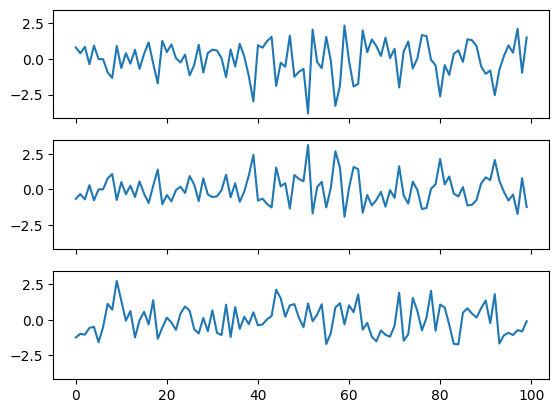

In [201]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA # found on the internet (https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html)
import numpy as np
import sklearn
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import FastICA
from sklearn.datasets import fetch_olivetti_faces
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import pairwise_distances_argmin_min

### first dataset - first dim reduction ###

# create dataset. dim = 10 (a-j) 100 random point each
a, b, c, d, e, f, g, h, i, j = np.random.randn(10, 100)
dataset_1 = np.array([a, b, c, d, e, f, g, h, i, j]).T # shape (100, 10)
X_1 = dataset_1.data
# print(dataset.shape)

### make plots use the same axes ###
fig, axs = plt.subplots(3, sharex=True, sharey=True)


### PCA ###
pca = PCA(n_components=1)
pca.fit(X_1) # fit the model with X

X_pca = pca.transform(dataset_1)  # fits the model with X and dim reduction on X
#print(reduced_dataset.shape) # new shape 2 dims instead of 10

axs[0].plot((X_pca))

# PCA reconstruction error #
X_reconstructed = pca.inverse_transform(X_pca)  # Reconstruct the data from reduced dimensions

pca_error = np.mean((X_pca - X_reconstructed) ** 2)
print(f"PCA Reconstruction Error: {pca_error}")

### ICA ###
transformer_ica = FastICA(n_components=1, random_state=0)
X_ica = transformer_ica.fit_transform(X_1[:100]) # take 100 samples like in first plot. shape (100,1)
#print(X_ica.shape)

axs[1].plot((X_ica))

# ICA reconstruction error
X_ica_reconstructed = transformer_ica.inverse_transform(X_ica)  # Reconstruct from independent components
ica_error = np.mean((X_ica - X_ica_reconstructed) ** 2)
print(f"ICA Reconstruction Error: {ica_error}")


### LDA ###
y = np.random.randint(0, 2, size=(X_1.shape[0],))  # create target 0 or 1

transformer_lda = LDA(n_components=1) # transform
X_lda = transformer_lda.fit_transform(X_1[:100], y) # shape (100, 1)

axs[2].plot((X_lda))

# Measure the minimum distance between points of different classes in the LDA space
lda_class_distances = pairwise_distances_argmin_min(X_lda, y.reshape(-1, 1))
print(f"Mean class separation: {np.mean(lda_class_distances[1])}")



In [202]:
dataset_2 = fetch_lfw_people() # get dataset
X_2 = dataset_2.data


PCA Reconstruction Error: 17.306808471679688
ICA Reconstruction Error: 1.0977510213851929
Mean class separation: 0.662253061812371


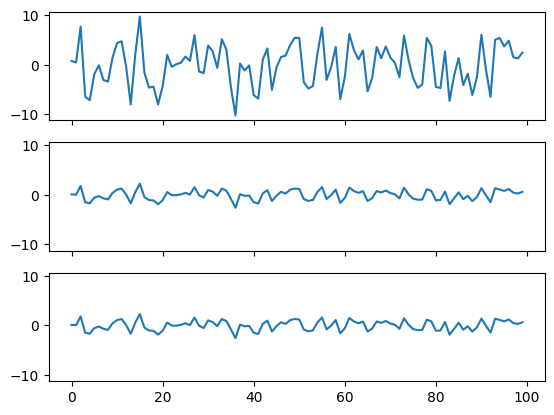

In [203]:
### make plots use the same axes ###
fig, axs = plt.subplots(3, sharex=True, sharey=True)

### PCA ###
pca = PCA(n_components=1)
pca.fit(X_2) # fit the model with X

X_pca = pca.transform(X_2[:100])  # fits the model with X and dim reduction on X
#print(X_pca.shape) # new shape 2 dims instead of 10

#plt.plot(X_pcd)
axs[0].plot(X_pca, label='PCA')

# PCA reconstruction error #
X_reconstructed = pca.inverse_transform(X_pca)  # Reconstruct the data from reduced dimensions

pca_error = np.mean((X_pca - X_reconstructed) ** 2)
print(f"PCA Reconstruction Error: {pca_error}")

### ICA ###
transformer_ica = FastICA(n_components=1, random_state=0)
X_2_subset = X_2[:100]
X_ica = transformer_ica.fit_transform(X_2_subset) # take 100 samples like in first plot
#print(X_ica.shape)
axs[1].plot(X_ica, label='ICA')

# ICA reconstruction error
X_ica_reconstructed = transformer_ica.inverse_transform(X_ica)  # Reconstruct from independent components
ica_error = np.mean((X_ica - X_ica_reconstructed) ** 2)
print(f"ICA Reconstruction Error: {ica_error}")

### LDA ###
transformer_lda = LDA(n_components=1) # transform
X_lda = transformer_lda.fit_transform(X_2[:100], dataset_2.target[:100]) # shape (100, 1)
axs[2].plot(X_ica, label='LDA')

# Measure the minimum distance between points of different classes in the LDA space
lda_class_distances = pairwise_distances_argmin_min(X_lda, y.reshape(-1, 1))
print(f"Mean class separation: {np.mean(lda_class_distances[1])}")

PCA Reconstruction Error: 16.662694931030273
ICA Reconstruction Error: 1.3002299070358276
Mean class separation: 2.8017108500003816


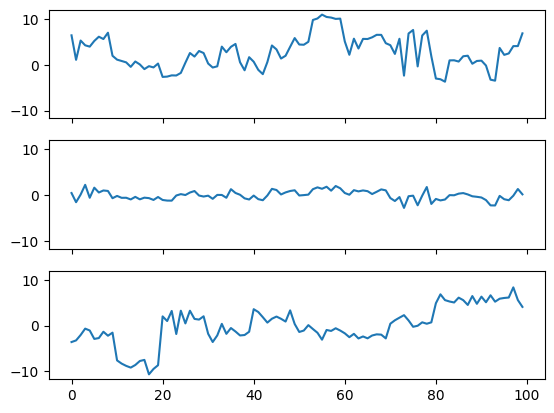

In [204]:
dataset_3 = fetch_olivetti_faces()
X_3 = dataset_3.data # shape = (400, 4096)
# print(X.shape)


### make plots use the same axes ###
fig, axs = plt.subplots(3, sharex=True, sharey=True)


### PCA ###
pca = PCA(n_components=1)
pca.fit(X_3) # fit the model with X

X_pca = pca.transform(X_3[:100])  # fits the model with X and dim reduction on X
#print(pca.shape) # new shape 2 dims instead of 10

#plt.plot(X_pcd)
axs[0].plot((X_pca))

# PCA reconstruction error #
X_reconstructed = pca.inverse_transform(X_pca)  # Reconstruct the data from reduced dimensions

pca_error = np.mean((X_pca - X_reconstructed) ** 2)
print(f"PCA Reconstruction Error: {pca_error}")

### ICA ###
transformer_ica = FastICA(n_components=1, random_state=0)
X_ica = transformer_ica.fit_transform(X_3[:100]) # take 100 samples like in first plot
#print(X_transformed.shape)

axs[1].plot((X_ica))

# ICA reconstruction error
X_ica_reconstructed = transformer_ica.inverse_transform(X_ica)  # Reconstruct from independent components
ica_error = np.mean((X_ica - X_ica_reconstructed) ** 2)
print(f"ICA Reconstruction Error: {ica_error}")


### LDA ###
transformer_lda = LDA(n_components=1) # transform
X_lda = transformer_lda.fit_transform(X_3[:100], dataset_3.target[:100]) # shape (100, 1)

# print(X_transformed.shape)

axs[2].plot((X_lda))

# Measure the minimum distance between points of different classes in the LDA space
lda_class_distances = pairwise_distances_argmin_min(X_lda, y.reshape(-1, 1))
print(f"Mean class separation: {np.mean(lda_class_distances[1])}")